# Forecasting the Status of Pass on the Morning at Left Database

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

## import libraries

In [2]:
df = pd.read_csv('./Data/Morning_Shift_Passed',header=None,index_col=None)

## Load the dataset

In [3]:
df.columns = ['Date_Time','Passed_Morning_Left']

## Add column title

In [4]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Date_Time'].dt

In [8]:
df.set_index('Date_Time',inplace=True)

In [9]:
df

,Passed_Morning_Left
Date_Time,
2018-10-05,7351
2018-10-06,0
2018-10-07,0
2018-10-08,240
2018-10-09,0
2018-10-10,0
2018-10-11,0
2018-10-12,0
2018-10-13,0


## Convert datatype

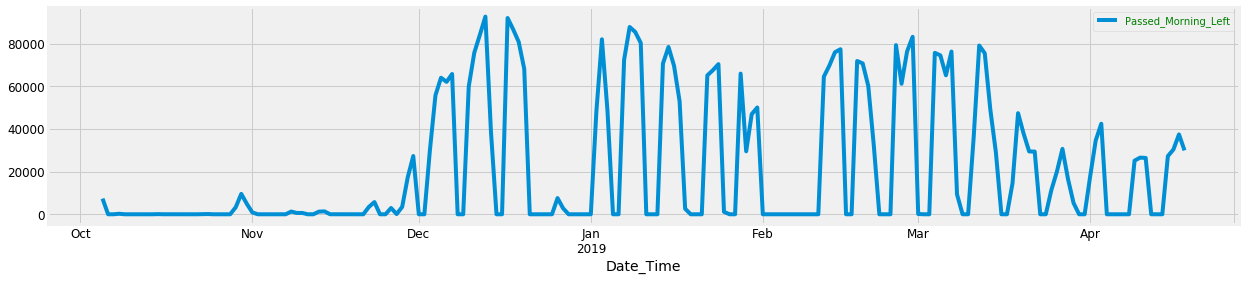

In [10]:
df.plot(figsize=(19, 4))
plt.show()

### Analyzing the chart, we can observe that the time-series has seasonality pattern

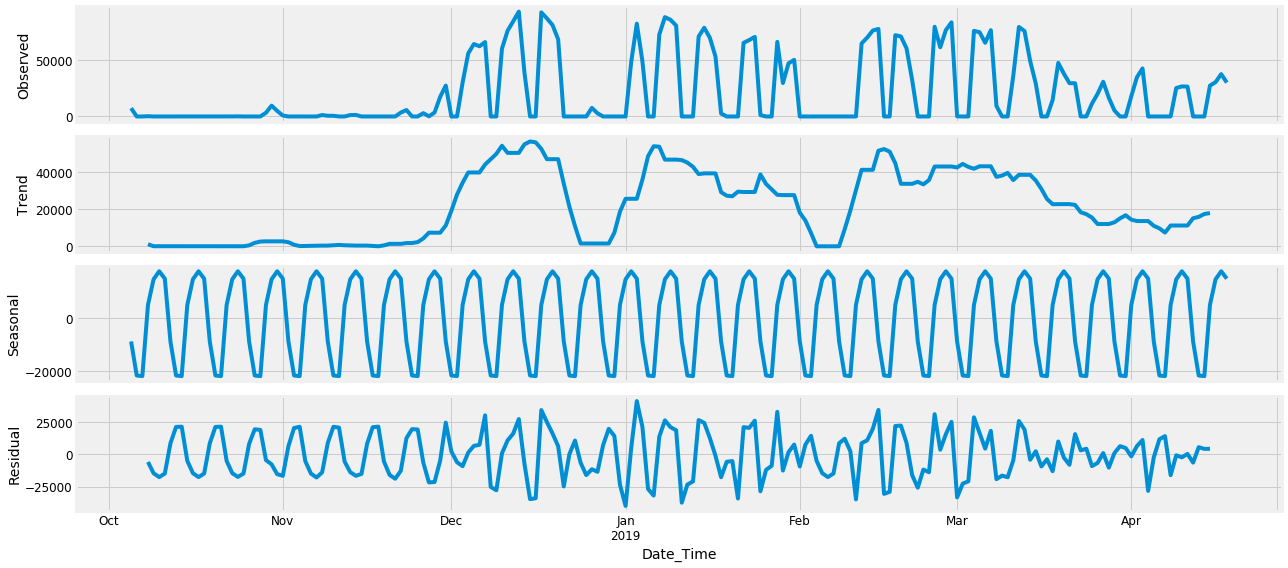

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

### Using the “sm.tsa.seasonal_decompose” command from the pylab library we can decompose the time-series into three distinct components: trend, seasonality, and noise.

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


## SARIMA to time series forecasting
### Let’s use SARIMA. The models notation is SARIMA(p, d, q).(P,D,Q)m. These three parameters account for seasonality, trend, and noise in data

In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

### According Peterson, T. (2014) the AIC (Akaike information criterion) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. The low AIC value the better. Our output suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 12) with AIC value of 3953.17 is the best combination, so we should consider this to be optimal option.

In [17]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5690      0.172      3.303      0.001       0.231       0.907
ma.L1         -0.9530      0.106     -9.019      0.000      -1.160      -0.746
ma.S.L12      -1.0129      0.066    -15.438      0.000      -1.141      -0.884
sigma2      1.377e+09   5.77e-11   2.39e+19      0.000    1.38e+09    1.38e+09


### in the “mod = sm.tsa.statespace.SARIMAX” command we need to set up the chosen combination.

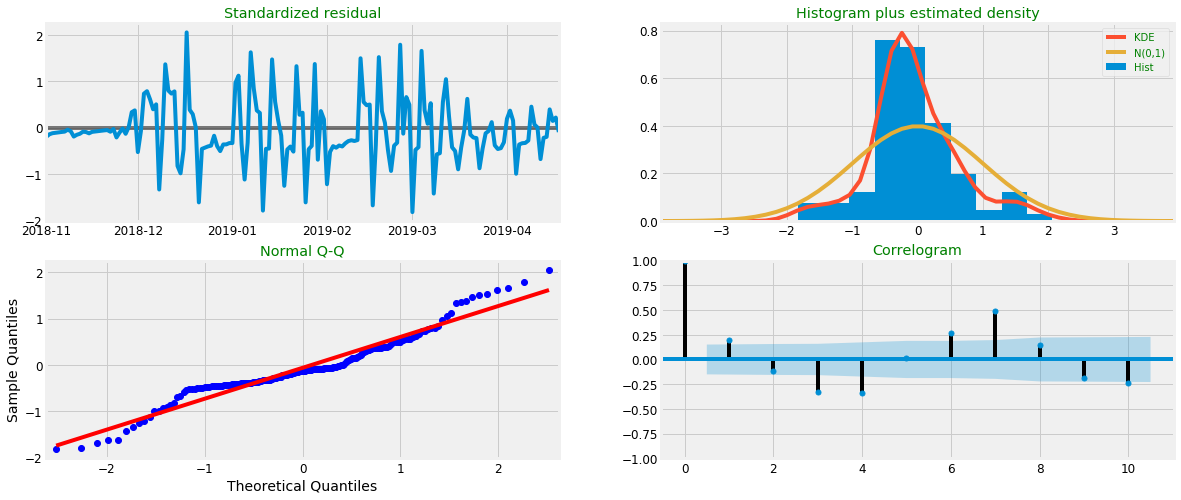

In [18]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

#### With the diagnostic above we can visualize important information as the distribution and the Auto correlation function ACF (correlogram). Values upward the “0” has some correlation over the time series data. Values near to “1” demonstrates strongest correlation.

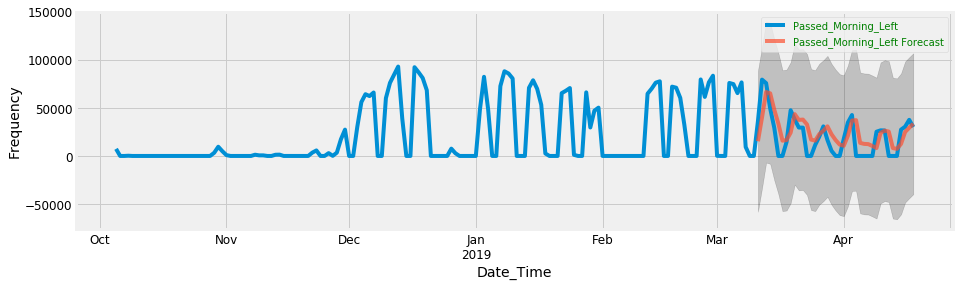

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2019-03-11'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2018-10-05':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Passed_Morning_Left Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date_Time')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

#### This step consists in comparing the true values with the forecast predictions. Our forecasts fit with the true values very well. The command “pred = results.get_prediction(start=pd.to_datetime(‘2019–03–11’)” determines the period which you would forecast in comparing with the true data.

In [22]:
y_forecasted = pred.predicted_mean
y_truth = df['2019-03-11':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2019-03-11 00:00:00   NaN
2019-03-12 00:00:00   NaN
2019-03-13 00:00:00   NaN
2019-03-14 00:00:00   NaN
2019-03-15 00:00:00   NaN
2019-03-16 00:00:00   NaN
2019-03-17 00:00:00   NaN
2019-03-18 00:00:00   NaN
2019-03-19 00:00:00   NaN
2019-03-20 00:00:00   NaN
2019-03-21 00:00:00   NaN
2019-03-22 00:00:00   NaN
2019-03-23 00:00:00   NaN
2019-03-24 00:00:00   NaN
2019-03-25 00:00:00   NaN
2019-03-26 00:00:00   NaN
2019-03-27 00:00:00   NaN
2019-03-28 00:00:00   NaN
2019-03-29 00:00:00   NaN
2019-03-30 00:00:00   NaN
2019-03-31 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-04-02 00:00:00   NaN
2019-04-03 00:00:00   NaN
2019-04-04 00:00:00   NaN
2019-04-05 00:00:00   NaN
2019-04-06 00:00:00   NaN
2019-04-07 00:00:00   NaN
2019-04-08 00:00:00   NaN
2019-04-09 00:00:00   NaN
2019-04-10 00:00:00   NaN
2019-04-11 00:00:00   NaN
2019-04-12 00:00:00   NaN
2019-04-13 00:00:00   NaN
2019-04-14 00:00:00   NaN
2019-04-15 00:00:00   NaN
2019-04-16 00:00:00   NaN
2019-04-17 0

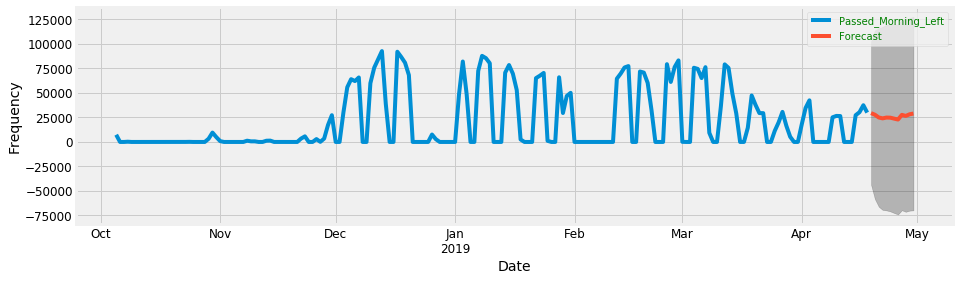

In [24]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

#### Here we forecast the sales for the next 12 days. This parameter can me modified in the line “pred_uc = results.get_forecast(steps=12)” of the code.

In [25]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2019-03-11    15284.624456
2019-03-12    40015.296026
2019-03-13    66264.194823
2019-03-14    64945.967733
2019-03-15    47894.347751
2019-03-16    33533.890935
2019-03-17    15863.629479
2019-03-18    16513.000934
2019-03-19    24167.248506
2019-03-20    43378.566582
2019-03-21    37389.698476
2019-03-22    37730.050097
Freq: D, dtype: float64

#### This step indicate the predicted values of the test we have ran before.


In [26]:
y_truth.head(12)

,Passed_Morning_Left
Date_Time,
2019-03-11,36067
2019-03-12,79156
2019-03-13,75523
2019-03-14,49174
2019-03-15,29111
2019-03-16,0
2019-03-17,0
2019-03-18,14544
2019-03-19,47420


#### This step indicate the truth values of the data set. We can compare the two series above to measure the model accuracy.


In [27]:
pred_ci.head(24)

,lower Passed_Morning_Left,upper Passed_Morning_Left
2019-04-19,-43623.244132,102462.518553
2019-04-20,-58255.314627,113850.149779
2019-04-21,-66079.957218,116049.041604
2019-04-22,-69346.088826,117492.829382
2019-04-23,-69841.960489,119633.191172
2019-04-24,-70846.946816,120366.506849
2019-04-25,-72476.219521,120055.822672
2019-04-26,-73937.520840,119707.896132
2019-04-27,-69656.954607,124988.982383
2019-04-28,-71265.997462,124378.573039


#### In the table above we can visualize the lower and upper values which the model indicate as boundaries for the forecasting.


In [28]:
forecast = pred_uc.predicted_mean
forecast.head(30)

2019-04-19    29419.637210
2019-04-20    27797.417576
2019-04-21    24984.542193
2019-04-22    24073.370278
2019-04-23    24895.615341
2019-04-24    24759.780017
2019-04-25    23789.801576
2019-04-26    22885.187646
2019-04-27    27666.013888
2019-04-28    26556.287789
2019-04-29    28225.799631
2019-04-30    28989.707520
Freq: D, dtype: float64